In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [2]:
verbatim_path = r'0018985-250310093411724/verbatim.txt'
occurrence_path = r'0018985-250310093411724/occurrence.txt'

In [3]:
with open(verbatim_path, 'r', encoding='utf-8') as f:
    lines = [line.rstrip('\n').split('\t') for line in f.readlines()]
    verbatim = pd.DataFrame(lines[1:], columns=lines[0])
    verbatim.shape

# Analyse Data

In [4]:
# verbatim.columns.tolist()

In [5]:
verbatim['eventDate'].unique()

array(['1987-12-21', '', '2011-02-20', ..., '08.04.1846', '10.1878',
       '1858/1862'], shape=(336666,), dtype=object)

In [6]:
filtered = verbatim[verbatim['eventDate'] != ''].copy()
filtered.shape

(443659, 190)

In [7]:
data = filtered[[
    'kingdom',
    'phylum',
    'class',
    'order',
    'family',
    'genus',
    'scientificName',
    'countryCode',
    'occurrenceStatus',
    'decimalLatitude',
    'decimalLongitude',
    'individualCount',
    'eventDate',
]].copy()
data

,kingdom,phylum,class,order,family,genus,scientificName,countryCode,occurrenceStatus,decimalLatitude,decimalLongitude,individualCount,eventDate
0,Animalia,Arthropoda,Malacostraca,Decapoda,Leucosiidae,Pseudophilyra,Pseudophilyra punctulata Chen & Ng 2003,,,,,1,1987-12-21
3,Animalia,Arthropoda,Insecta,Orthoptera,Haglotettigoniidae,Endodrelanva,Endodrelanva jimini Tan et Kamaruddin,,,,,1,2011-02-20
5,Animalia,Arthropoda,Insecta,Orthoptera,Haglotettigoniidae,Odontogryllodes,Odontogryllodes latus Chopard 1969,,,1.412564,103.796,1,2016-01-11
7,Animalia,Arthropoda,Insecta,Orthoptera,Haglotettigoniidae,Duolandrevus,Duolandrevus (Bejorama) parvulus Gorochov 2016,,,,,1,2013-09-07
9,Animalia,Arthropoda,Insecta,Orthoptera,Haglotettigoniidae,Odontogryllodes,Odontogryllodes latus Chopard 1969,,,,,1,2011-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689337,,,,,Portunidae,,Scylla serrata (Forskål 1775),,,,,,1876
1689340,,,,,Eriphiidae,,Eriphia smithii MacLeay 1838,,,,,,1858
1689341,,,,,Xanthidae,,"Etisus utilis Jacquinot, in Jacquinot & Lucas ...",,,,,,1858/1862
1689342,Animalia,Arthropoda,Insecta,Odonata,Libellulidae,Nannophya,"Nannophya koreana Bae, Yum, Kim, Suh, and Kang...",,,,,1,2009-07-14


# Clean Data

In [8]:
data['eventDateISO'] = pd.to_datetime(data['eventDate'], errors='coerce')
cleaned = data.dropna(subset=['eventDateISO']).copy()
cleaned['year'] = data['eventDateISO'].dt.year.astype('Int64')
cleaned['individualCount'] = pd.to_numeric(data['individualCount'], errors='coerce').fillna(0).astype('Int64')
cleaned.shape

(63119, 15)

In [9]:
cleaned.to_csv('SG-Occurrence-Cleaned.csv')

# Plot Occurence Trend

In [10]:
data = cleaned.groupby('year').size()
data

year
1702       1
1828       1
1830       1
1845       1
1847       1
        ... 
2021    5730
2022    5503
2023    4616
2024    5161
2025     928
Length: 169, dtype: int64

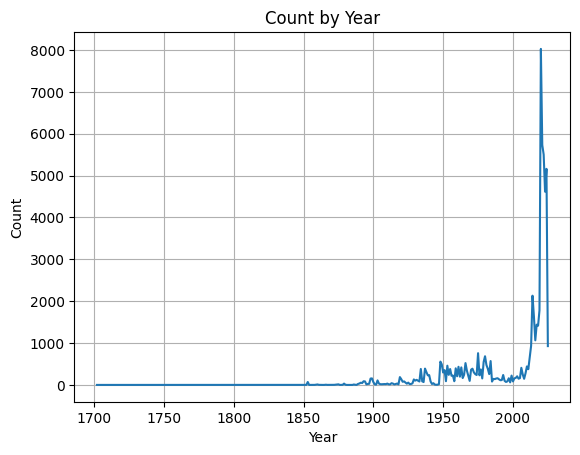

In [11]:
data.plot(x='year2', kind='line')
plt.title('Count by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()